# Project 3a: Hough Transform 

The purpose of this project is to acquaint you with the fundamental techniques behind two fundamental feature detection algorithms in Computer Vision: the Hough Transform and the Canny Filter.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from project3 import *

# Part 1: Sobel Edge Detector


Congratulations!  You've unlocked the cv2.filter2d() method, which will replace the (non-linearly separable) filtering algorithms you created in Project 2.

Use it to implement a Sobel Edge detector.  As described in the textbook, the Sobel kernel finds oriented edges.    The kernel for finding vertical edges is:

$$ G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$

and the kernel for finding horizontal edges is:

$$ G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix}$$

Using filter2d, run each of these kernels separately over some greyscale images, and show the results below.   How are the x and y gradients different?

Hint: I recommend *first* running a slight gaussian blur over an image to remove the worst high frequency noise.




Notes:
- x gradients find vertical edges
- y gradients find horizontal edges

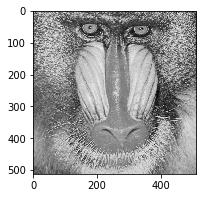

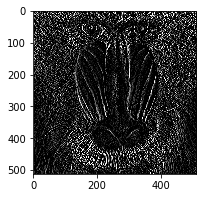

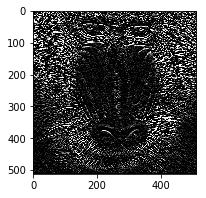

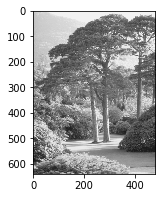

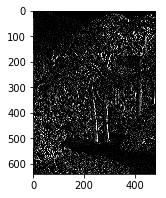

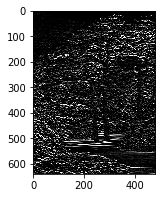

In [2]:
image1 = cv2.imread('../images/project3/demo.pgm')
image2 = cv2.imread('../images/project3/foliage.ascii.pgm')

kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#Try image1
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3)); plt.imshow((image1).astype(np.uint8));

plt.figure(figsize=(3,3)); plt.imshow((cv2.filter2D(gray1, -1, kernel_x)).astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.figure(figsize=(3,3)); plt.imshow((cv2.filter2D(gray1, -1, kernel_y)).astype(np.uint8), cmap='gray', vmin=0, vmax=255)

# Try image2
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3)); plt.imshow((image2).astype(np.uint8));

plt.figure(figsize=(3,3)); plt.imshow((cv2.filter2D(gray2, -1, kernel_x)).astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.figure(figsize=(3,3)); plt.imshow((cv2.filter2D(gray2, -1, kernel_y)).astype(np.uint8), cmap='gray', vmin=0, vmax=255)

In [3]:
#TESTING CODE FOR SOBEL
sobel = sobel(gray1)
print(sobel[0])

[[ 0.     1.     0.    ...  0.     0.     0.   ]
 [ 0.     1.     0.    ...  0.     1.414  2.   ]
 [ 0.     1.    14.    ... 11.    13.04   8.   ]
 ...
 [ 0.     1.    11.49  ...  6.402 10.25   0.   ]
 [ 0.     1.     4.    ...  9.85  12.     0.   ]
 [ 0.    12.    12.805 ...  2.    15.1    0.   ]]


Of course, we're really presently only interested in the magnitude, not the orientation of edges (although that'll change soon), so we can use the following formula:

$G = \sqrt{G_{x}^{2} + G_{y}^{2}}$

In the cell below, show results of calculating the edge magnitude of the images you tested above

# Part 2: Hough Transform

Following Tuesday's lecture, recall that the Hough Transform is a way to find the predominant lines in an image (generally, a de-noised and edge-detected image).  It all revolves around using the equation:

$\rho = x*cos(\theta) + y*sin(\theta)$

to define a line.

Let's begin by "discretizing" our $\theta$ (angle) values into ten discrete values:


In [4]:
thetaVals = np.linspace(0,math.pi,9) #8 vals between 0 and pi

Then we can define a bunch of arbitrary points:

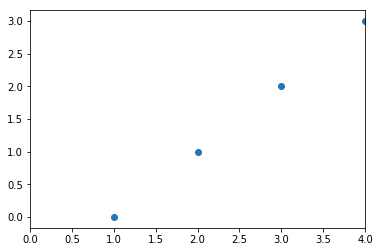

In [5]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,4)
plt.scatter(xs,ys)

Here's what we get for sweeping through the theta values described above, and finding each corresponding $\rho$ value:

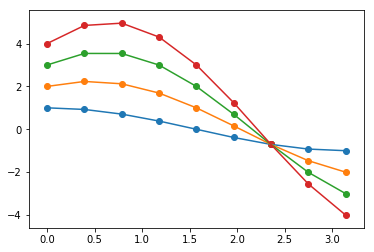

In [6]:
rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 
    

Notice that each point's $\rho$ values form a sinusoidal shape, and that all the shapes intersect at 3/4*$\pi$ (that is, 135 degrees).   What $\rho$ value do they intersect at?

Let's try a different set of points:

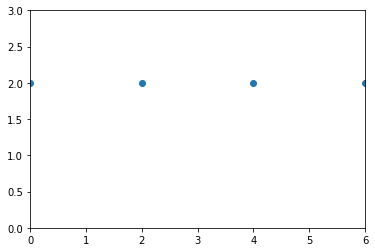

In [7]:
pt0 = (0,2)
pt1 = (2,2)
pt2 = (4,2)
pt3 = (6,2)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,6)
plt.ylim(0,3)
plt.scatter(xs,ys)

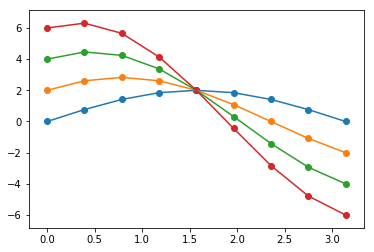

In [8]:
rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 

--- 
And this is what it looks like whe nwe have *two dominant lines in an image.

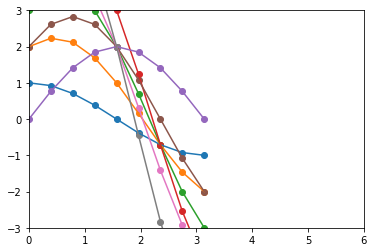

In [9]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pt10 = (0,2)
pt11 = (2,2)
pt12 = (4,2)
pt13 = (6,2)
pts = [pt0,pt1,pt2,pt3,pt10,pt11,pt12,pt13]

plt.xlim(0,6)
plt.ylim(-3,3)
#plt.scatter(xs,ys)


rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 

## Part 1: The Hough Transform

Now that you understand how the Hough Transform works, try to replicate (by hand) the OpenCV Hough Transform function using an function signature.

The Hough Transform, as covered in class, is an algorithm where each non-zero pixel in an image (typically an edge-detected, thresholded image) "votes" for every line in might belong to.  In the above examples, we've discretized the angles that our lines could belong to into eight possible $\theta$ values, and then calculated $\rho$ for each point for each theta value.  In both examples above, all for points agree they belong to the same line.  

The Hough Transform, then, takes in a set of points, and returns a set of lines.  Following the [openCV API]( https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghlines), the Hough transform method should take the following form: 

lines = cv2.HoughLines(image, rho, theta, threshold)

That is, it should return an output vector of lines whose "votes" exceed the provided vote threshold.  Each line is represented by a two-element vector ($\rho$, $\theta$). Read the API to understand the units of the rho and theta arguments.






My HoughLines:
[[[196.          1.5707964]]

 [[263.          1.5707964]]]

OpenCV's HoughLines
[[[196.          1.5707964]]

 [[263.          1.5707964]]]


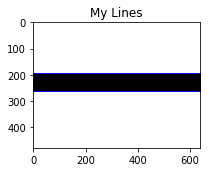

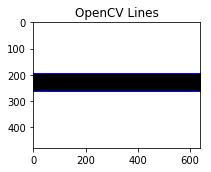

In [10]:
image3 = cv2.imread('../images/project3/horz.pgm')
image_cv3 = np.copy(image3)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
edges3 = cv2.Canny(gray3,50,150,apertureSize = 3)

lines3 = myHoughLines(edges3, 1, np.pi/180, 100)
print("My HoughLines:")
print(lines3)

#Graph lines
for line in lines3:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image3,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('My Lines'); plt.imshow(image3)

#Compare to OpenCV
lines_cv3 = cv2.HoughLines(edges3, 1, np.pi/180, 100)
print("\nOpenCV's HoughLines")
print(lines_cv3)

for line in lines_cv3:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image_cv3,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('OpenCV Lines'); plt.imshow(image_cv3)

My HoughLines:
[[[-321.           2.3387412]]

 [[-306.           3.1415927]]

 [[-251.           3.1415927]]

 [[-142.           2.3038347]]

 [[  92.           1.5707964]]

 [[ 130.           1.5707964]]

 [[ 251.           0.       ]]

 [[ 306.           0.       ]]

 [[ 448.           0.7504916]]

 [[ 449.           0.7504916]]

 [[ 452.           0.7330383]]

 [[ 453.           0.7330383]]

 [[ 456.           0.715585 ]]

 [[ 457.           0.715585 ]]]

OpenCV's HoughLines
[[[ 306.            0.        ]]

 [[ 251.            0.        ]]

 [[ 452.            0.7330383 ]]

 [[ 130.            1.5707964 ]]

 [[  92.            1.5707964 ]]

 [[-330.            2.3561945 ]]

 [[ 456.            0.715585  ]]

 [[-134.            2.2863812 ]]

 [[ 447.            0.75049156]]

 [[-338.            2.3736477 ]]]


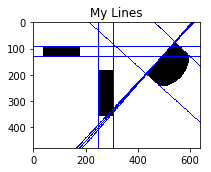

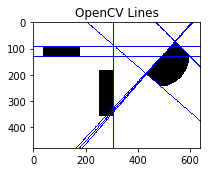

In [11]:
image = cv2.imread('../images/project3/testimage.pgm')
image_cv = np.copy(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = myHoughLines(edges, 1, np.pi/180, 64)
print("My HoughLines:")
print(lines)

#Graph lines
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('My Lines'); plt.imshow(image)

#OpenCV
lines_cv = cv2.HoughLines(edges, 1, np.pi/180, 64)
print("\nOpenCV's HoughLines")
print(lines_cv)

for line in lines_cv:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image_cv,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('OpenCV Lines'); plt.imshow(image_cv)

My HoughLines:
[[[1.44728301e+01 1.65806280e+00]]

 [[1.54709563e+01 1.64060950e+00]]

 [[1.64690825e+01 1.62315630e+00]]

 [[4.14222378e+01 5.23599000e-02]]

 [[4.24203640e+01 6.98132000e-02]]

 [[4.34184902e+01 8.72665000e-02]]

 [[7.03678979e+01 1.65806280e+00]]

 [[7.13660241e+01 1.64060950e+00]]

 [[7.23641503e+01 1.62315630e+00]]

 [[9.53210531e+01 3.49066000e-02]]

 [[9.63191794e+01 6.98132000e-02]]

 [[9.73173056e+01 8.72665000e-02]]]

OpenCV's HoughLines
[[[4.2000000e+01 6.9813170e-02]]

 [[9.6000000e+01 6.9813170e-02]]

 [[7.1000000e+01 1.6406095e+00]]

 [[1.5000000e+01 1.6406095e+00]]

 [[7.2000000e+01 1.6231562e+00]]

 [[9.5000000e+01 5.2359879e-02]]

 [[4.3000000e+01 8.7266460e-02]]

 [[4.1000000e+01 5.2359879e-02]]

 [[9.7000000e+01 8.7266460e-02]]

 [[1.6000000e+01 1.6231562e+00]]]


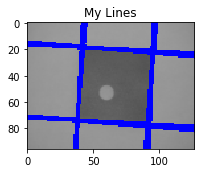

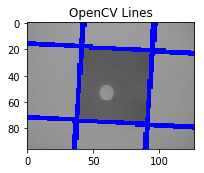

In [12]:
image2 = cv2.imread('../images/project3/testimage2.pgm')
image_cv2 = np.copy(image2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
edges2 = cv2.Canny(gray2,50,150,apertureSize = 3)

lines2 = myHoughLines(edges2, 1, np.pi/180, 35)
print("My HoughLines:")
print(lines2)

for line in lines2:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image2,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('My Lines'); plt.imshow(image2)

#OpenCV
lines_cv2 = cv2.HoughLines(edges2, 1, np.pi/180, 35)
print("\nOpenCV's HoughLines")
print(lines_cv2)

for line in lines_cv2:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image_cv2,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(3,3)); plt.title('OpenCV Lines'); plt.imshow(image_cv2)